# Solar GHI Prediction with Multiple Neural Network Models

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
file_paths = ["3196709_28.61_77.22_2017.csv", "3196709_28.61_77.22_2018.csv", "3196709_28.61_77.22_2019.csv"]
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path, skiprows=2)
    return df
data = pd.concat([load_and_clean_data(file) for file in file_paths], ignore_index=True)
print(data.head())

   Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0  2017      1    1     0      30          8.7             0             0   
1  2017      1    1     1      30          8.5             0             0   
2  2017      1    1     2      30          8.2             0             0   
3  2017      1    1     3      30          7.9             0             0   
4  2017      1    1     4      30          7.7             0             0   

   Clearsky GHI  Cloud Type  ...  Fill Flag  GHI  Ozone  Relative Humidity  \
0             0           0  ...          0    0  0.285              38.99   
1             0           0  ...          0    0  0.287              39.15   
2             0           0  ...          0    0  0.289              39.64   
3             0           0  ...          0    0  0.292              40.12   
4             0           0  ...          0    0  0.294              40.22   

   Solar Zenith Angle  Surface Albedo  Pressure  Precipitable 

In [ ]:
features = ["Year", "Month", "Day", "Hour", "Minute", "Temperature", "Clearsky DHI",
            "Clearsky DNI", "Clearsky GHI", "Cloud Type", "Ozone", "Relative Humidity",
            "Solar Zenith Angle", "Surface Albedo", "Pressure", "Precipitable Water",
            "Wind Direction", "Wind Speed"]
target = "GHI"
X = data[features]
y = data[target]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (21024, 18), Testing Data: (5256, 18)


In [ ]:
# FFNN
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
])
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


c:\Users\Himanshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 77566.7812 - mae: 171.2037 - val_loss: 6138.9907 - val_mae: 35.0305
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5735.7388 - mae: 34.5292 - val_loss: 5478.4185 - val_mae: 31.5338
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5416.1172 - mae: 32.4238 - val_loss: 5306.9150 - val_mae: 31.4187
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5104.6367 - mae: 30.4425 - val_loss: 5213.6572 - val_mae: 30.7845
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5192.4497 - mae: 30.8431 - val_loss: 5130.9272 - val_mae: 30.8490
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4908.9917 - mae: 29.7513 - val_loss: 5009.1318 - val_mae: 30.4931
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4716.5762 - mae: 29.2524 - val_loss: 4884.6836 - val_mae: 29.4857
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4803.5747 - mae: 29.5513 - val_loss: 4691.8130 - val_mae: 27.9557
E

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


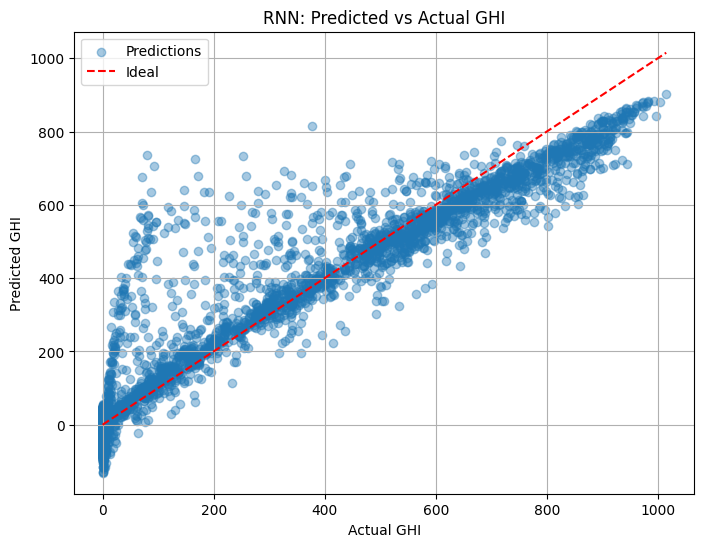

In [ ]:
# RNN: Predicted vs Actual GHI
rnn_preds = model_rnn.predict(X_test_rnn).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rnn_preds, alpha=0.4, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("RNN: Predicted vs Actual GHI")
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# RNN
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model_rnn = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(1, X_train.shape[1])),
    layers.Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)

Epoch 1/50


c:\Users\Himanshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 110557.5391 - mae: 201.4744 - val_loss: 69000.1484 - val_mae: 203.5319
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55275.5352 - mae: 184.7909 - val_loss: 28655.1621 - val_mae: 131.0864
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22101.1289 - mae: 109.5156 - val_loss: 12575.4678 - val_mae: 78.4693
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11304.1660 - mae: 74.8495 - val_loss: 10388.5410 - val_mae: 71.2821
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10036.3535 - mae: 69.6008 - val_loss: 9821.8428 - val_mae: 68.3486
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9788.9209 - mae: 67.3190 - val_loss: 9485.0186 - val_mae: 65.9023
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9313.6035 - mae: 65.3881 - val_loss: 9244.3838 - val_mae: 64.3700
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9144.9736 - mae: 63.9523 - val_loss: 9051.1631 - val_m

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


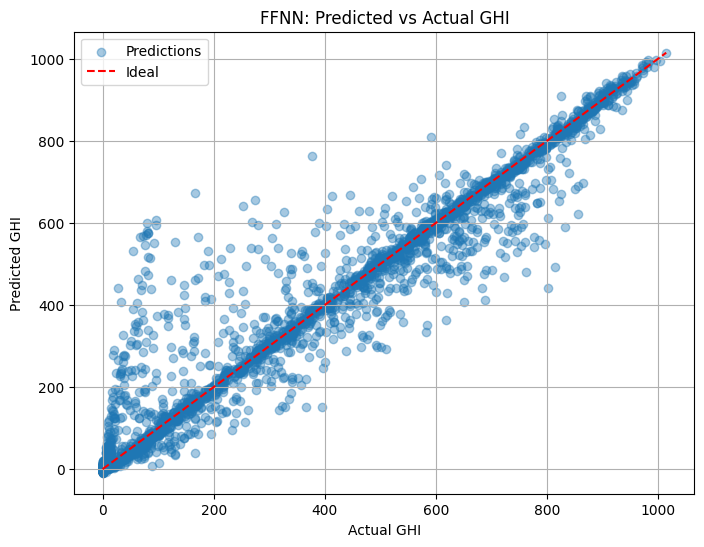

In [ ]:
# FFNN: Predicted vs Actual GHI
ffnn_preds = model.predict(X_test).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ffnn_preds, alpha=0.4, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("FFNN: Predicted vs Actual GHI")
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# LSTM
model_lstm = keras.Sequential([
    layers.LSTM(64, activation='tanh', input_shape=(1, X_train.shape[1])),
    layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_lstm = model_lstm.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 120095.1719 - mae: 205.4450 - val_loss: 109554.6172 - val_mae: 209.2342
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 105184.6641 - mae: 210.1418 - val_loss: 99852.7578 - val_mae: 207.6168
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 92770.5547 - mae: 195.5400 - val_loss: 87496.7031 - val_mae: 172.4288
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 81137.0469 - mae: 163.5028 - val_loss: 77713.8438 - val_mae: 156.7391
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 73177.8828 - mae: 150.7260 - val_loss: 69357.1172 - val_mae: 144.6266
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 66465.5156 - mae: 142.2865 - val_loss: 61980.0742 - val_mae: 135.4809
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58379.8828 - mae: 130.9801 - val_loss: 55317.2344 - val_mae: 126.4873
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 52037.8438 - mae: 121.6012 

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


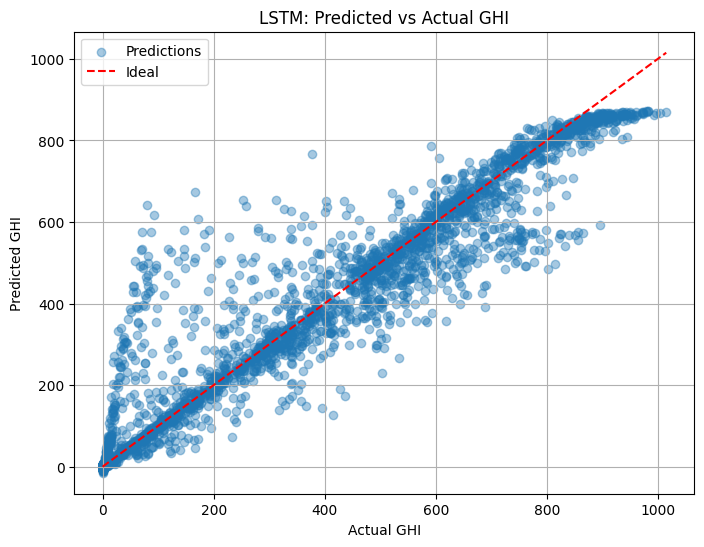

In [ ]:
# LSTM: Predicted vs Actual GHI
lstm_preds = model_lstm.predict(X_test_rnn).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lstm_preds, alpha=0.4, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("LSTM: Predicted vs Actual GHI")
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model_cnn = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=1)

Epoch 1/50


c:\Users\Himanshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 93028.9688 - mae: 213.0571 - val_loss: 12824.7822 - val_mae: 75.6753
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10248.2031 - mae: 62.8158 - val_loss: 8364.9463 - val_mae: 49.8875
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8433.9795 - mae: 49.7613 - val_loss: 7373.9619 - val_mae: 48.0144
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7001.1279 - mae: 44.4231 - val_loss: 6272.0718 - val_mae: 42.2170
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6231.6104 - mae: 41.2498 - val_loss: 5662.0464 - val_mae: 39.0709
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5585.3140 - mae: 38.7873 - val_loss: 5427.5073 - val_mae: 38.1371
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5580.5923 - mae: 38.0277 - val_loss: 5491.1865 - val_mae: 37.3138
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5366.3159 - mae: 36.7166 - val_loss: 5136.7197 - val_mae: 35.2498

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


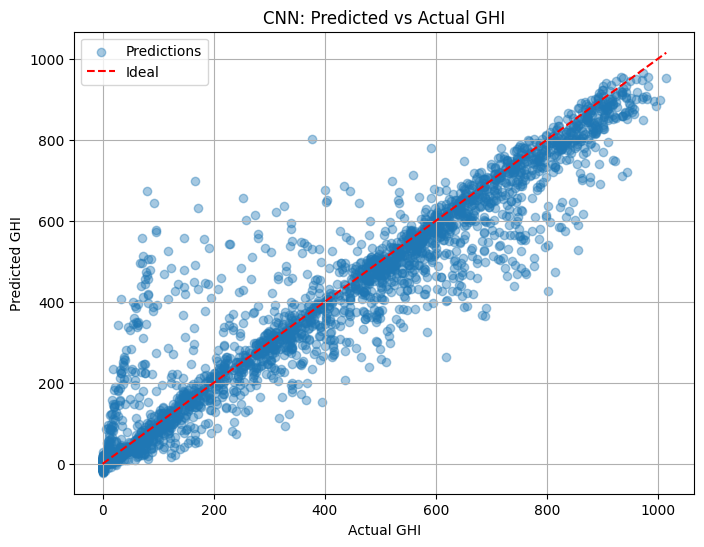

In [ ]:
# CNN: Predicted vs Actual GHI
cnn_preds = model_cnn.predict(X_test_cnn).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, cnn_preds, alpha=0.4, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("CNN: Predicted vs Actual GHI")
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.legend()
plt.grid(True)
plt.show()


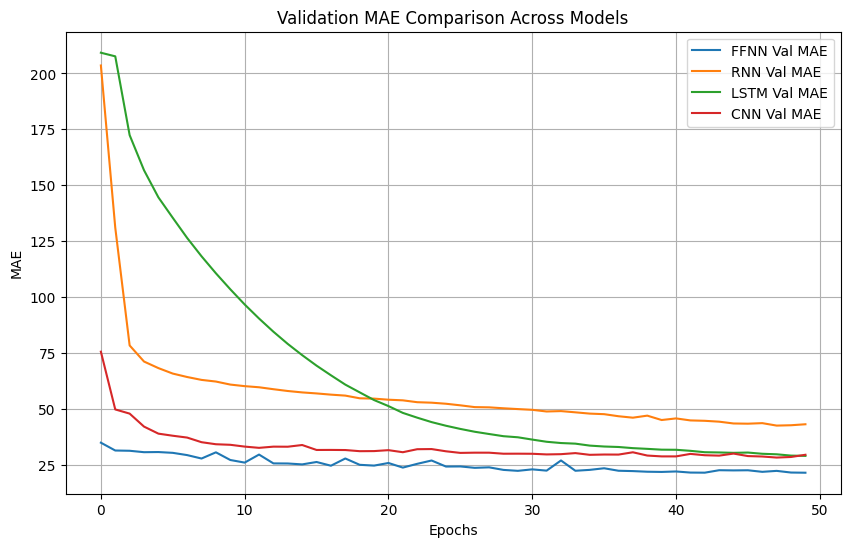

In [ ]:
# Plot MAE Comparison
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_mae'], label='FFNN Val MAE')
plt.plot(history_rnn.history['val_mae'], label='RNN Val MAE')
plt.plot(history_lstm.history['val_mae'], label='LSTM Val MAE')
plt.plot(history_cnn.history['val_mae'], label='CNN Val MAE')
plt.title("Validation MAE Comparison Across Models")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate All Models
def evaluate_model(model, X_test, y_test, reshape=False):
    if reshape:
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    preds = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return mae, r2
results = {
    "FFNN": evaluate_model(model, X_test, y_test),
    "RNN": evaluate_model(model_rnn, X_test_rnn, y_test),
    "LSTM": evaluate_model(model_lstm, X_test_rnn, y_test),
    "CNN": evaluate_model(model_cnn, X_test_cnn, y_test)
}
for name, (mae, r2) in results.items():
    print(f"{name} - MAE: {mae:.2f}, R²: {r2:.2f}")

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
FFNN - MAE: 21.61, R²: 0.96
RNN - MAE: 43.26, R²: 0.93
LSTM - MAE: 29.13, R²: 0.94
CNN - MAE: 29.63, R²: 0.95
